# Clasificacion Basica de Imagenes con Redes Neuronales

Se utilizara un modelo de red neuronal para clasificar imágenes de ropa, como zapatillas y camisas. 

Se utiliza [tf.keras](https://www.tensorflow.org/guide/keras), una APUI de alto nivel para crear y entrenar modelos de TensorFlow.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importar librerias
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias basicas
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


## Importar el Fashion MNIST dataset

El [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset que contiene 70,000 imágenes en escala de grises en 10 categorías. Las imágenes muestran prendas individuales a baja resolución (28 por 28 píxeles), como se ve aquí:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Se usaran 60,000 imágenes para entrenar la red neuronal y 10,000 imágenes para evaluar con qué precisión la red aprendió a clasificar las imágenes.
Importar el Fashion MNIST dataset:

In [4]:
# importar el dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Al cargar el dataset obtenemos cuatro  NumPy arrays:

* `train_images` y `train_labels` arrays  son el *set de entrenamiento* are the *training set*—Para entrenar el modelo.
* El modelo es evaluado con el  *test set*,   `test_images`, y `test_labels` arrays.

Las imagenes son NumPy arrays de 28x28 pixels en un rango entre 0 y 255.  *labels*  es un arreglo de enteros en un rango de 0 a 9. Estos corresponden a la  *class* de la vestimenta a la qeu corresponde:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

Cada imagen solo tiene una etiqueta (label), como los nombres de las clases *class names*  no estan incluidas en el dataset las vamos a crear para luego poder graficarlas con las imagenes.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorar los datos

Exploremos el formato del conjunto de datos antes de entrenar el modelo. A continuación, se muestra que hay 60,000 imágenes en el conjunto de entrenamiento, con cada imagen representada como 28 x 28 píxeles:

In [6]:
train_images.shape

(60000, 28, 28)

Del mismo modo, hay 60,000 etiquetas en el conjunto de entrenamiento:

In [7]:
len(train_labels)

60000

Cada etiqueta es un entero entre 0 y 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imágenes en el conjunto de prueba. Nuevamente, cada imagen se representa como 28 x 28 píxeles:

In [9]:
test_images.shape

(10000, 28, 28)

Y el conjunto de prueba contiene 10.000 etiquetas de imágenes:

In [10]:
len(test_labels)

10000

## Preprocesar los datos
Los datos deben preprocesarse antes de entrenar la red. Si inspecciona la primera imagen en el conjunto de entrenamiento, verá que los valores de píxel caen en el rango de 0 a 255:

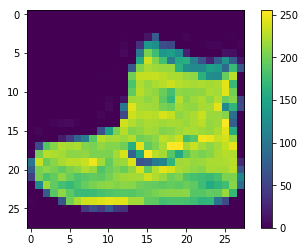

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

escalamos estos valores a un rango de 0 a 1 antes de alimentar al modelo de red neuronal. Para esto, coloque el tipo de datos de los componentes de la imagen de un entero a un flotante y divida por 255. Aquí está la función para preprocesar las imágenes:

Es importante que el *conjunto de entrenamiento* y el *conjunto de prueba* se preprocesen de la misma manera:

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Muestre las primeras 25 imágenes del *conjunto de entrenamiento* y visualice el nombre de la clase debajo de cada imagen. Verifique que los datos estén en el formato correcto y que estamos listos para construir y entrenar la red.

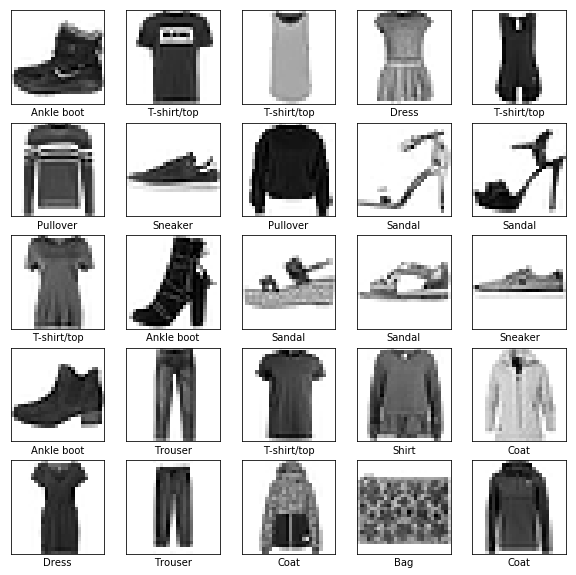

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Entrenar el  modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las capas

El bloque de construcción básico de una red neuronal es la *capa*. Las capas extraen representaciones de los datos introducidos en ellas. Y, con suerte, estas representaciones son más significativas para el problema en cuestión.

La mayor parte del aprendizaje profundo consiste en encadenar capas simples. La mayoría de las capas, como `tf.keras.layers.Dense`, tienen parámetros que se aprenden durante el entrenamiento.

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

La primera capa de esta red, `tf.keras.layers.Flatten`, transforma el formato de las imágenes de una matriz 2d (de 28 por 28 píxeles) a una matriz 1d de 28 * 28 = 784 píxeles. Piense en esta capa como desapilar filas de píxeles en la imagen y alinearlos. Esta capa no tiene parámetros para aprender; solo reformatea los datos.

Después de que los píxeles se aplanan, la red consta de una secuencia de dos capas `tf.keras.layers.Dense`. Estas son capas neuronales densamente conectadas o totalmente conectadas. La primera capa `Densa` tiene 128 nodos (o neuronas). La segunda (y última) capa es una capa de 10 nodos * softmax *; esto arroja una matriz de 10 puntuaciones de probabilidad que suman 1. Cada nodo contiene una puntuación que indica la probabilidad de que la imagen actual pertenezca a una de las 10 clases .

### Compilar el Modelo

Antes de que el modelo esté listo para el entrenamiento, necesita algunas configuraciones más. Estos se agregan durante el paso de compilación * del modelo:

**Función de pérdida**: mide la precisión del modelo durante el entrenamiento. Queremos minimizar esta función para "dirigir" el modelo en la dirección correcta.

**Optimizador**: así es como se actualiza el modelo según los datos que ve y su función de pérdida.

**Métricas**: se usa para monitorear los pasos de entrenamiento y prueba. El siguiente ejemplo usa *accuracy*, la fracción de las imágenes que están clasificadas correctamente.

In [20]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

El entrenamiento del modelo de red neuronal requiere los siguientes pasos:

1. Introduzca los datos de entrenamiento en el modelo; en este ejemplo, las matrices `train_images` y` train_labels`.
2. El modelo aprende a asociar imágenes y etiquetas.
3. Le pedimos al modelo que haga predicciones sobre un conjunto de pruebas; en este ejemplo, el conjunto `test_images`. Verificamos que las predicciones coincidan con las etiquetas de la matriz `test_labels`.

Para comenzar a entrenar, llame al método `model.fit`: el modelo está" en forma "con los datos de entrenamiento:

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.5025 - acc: 0.8235
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.3784 - acc: 0.8633
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3403 - acc: 0.8760
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3149 - acc: 0.8846
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.2970 - acc: 0.8893
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2827 - acc: 0.8967
Epoch 7/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.2699 - acc: 0.9001
Epoch 8/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2579 - acc: 0.9047
Epoch 9/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.2479 - acc: 0.9088
Epoch 10/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2393 - acc: 0.9110

A medida que el modelo entrena, se muestran las métricas de pérdida y precisión. Este modelo alcanza una precisión de aproximadamente 0,88 (u 88%) en los datos de entrenamiento.

## Evaluar el resultado

A continuación, compare cómo se realiza el modelo en el conjunto de datos de prueba:

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 29us/step
Test accuracy: 0.8832


Resulta que la precisión en el conjunto de datos de prueba es un poco menor que la precisión en el conjunto de datos de entrenamiento. Esta brecha entre la precisión del entrenamiento y la precisión de la prueba es un ejemplo de *overfitting*. El sobreajuste es cuando un modelo de aprendizaje automático tiene un peor rendimiento en los datos nuevos que en sus datos de entrenamiento.

## Realizar predicciones

Con el modelo entrenado, podemos usarlo para hacer predicciones sobre algunas imágenes.

In [23]:
predictions = model.predict(test_images)

Aquí, el modelo ha predicho la etiqueta para cada imagen en el conjunto de prueba. Echemos un vistazo a la primera predicción:

In [24]:
predictions[0]

array([4.4830590e-06, 3.9525030e-06, 1.7510245e-04, 5.7657118e-08,
       3.2731030e-05, 1.5829888e-01, 3.0766645e-05, 1.8269128e-01,
       3.9680253e-06, 6.5875876e-01], dtype=float32)

Una predicción es una matriz de 10 números. Estos describen la "confianza" del modelo que la imagen corresponde a cada una de las 10 diferentes prendas de vestir. Podemos ver qué etiqueta tiene el mayor valor de confianza:

In [25]:
np.argmax(predictions[0])

9

Entonces, el modelo está más seguro de que esta imagen es una bota de tobillo, o `class_names [9]`. Y podemos verificar la etiqueta de la prueba para ver si esto es correcto:

In [26]:
test_labels[0]

9

Podemos graficar esto para ver el conjunto completo de 10 canales

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Miremos la primera imagen, las predicciones y matriz de predicción.

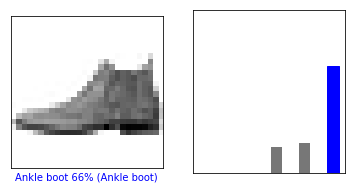

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

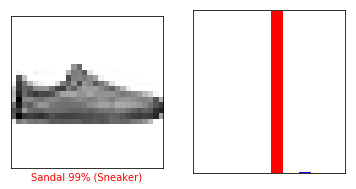

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Vamos a graficar varias imágenes con sus predicciones. Las etiquetas de predicción correctas son azules y las etiquetas de predicción incorrectas son rojas. El número da el porcentaje (de 100) para la etiqueta predicha. Tenga en cuenta que puede ser incorrecto incluso cuando tiene mucha confianza.

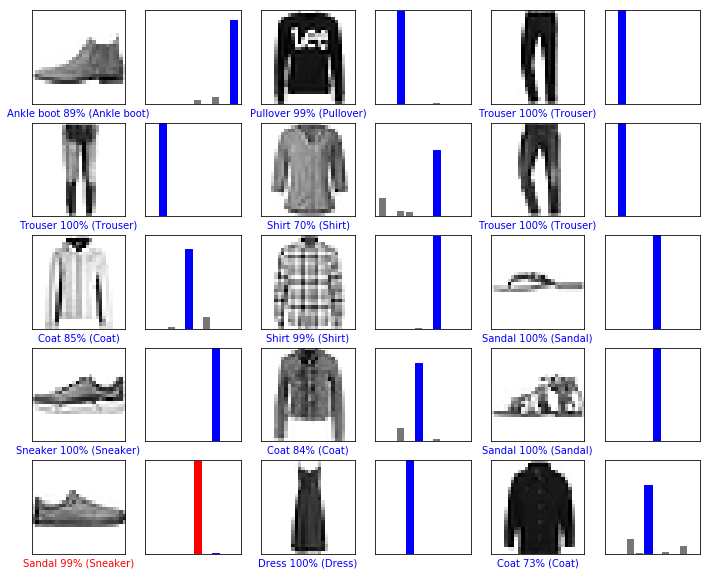

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)


Finalmente, use el modelo entrenado para hacer una predicción sobre una sola imagen.

In [29]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


Los modelos `tf.keras` están optimizados para hacer predicciones en un *batch*, o colección, de ejemplos a la vez. Entonces, aunque estamos usando una sola imagen, debemos agregarla a una lista:

In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora predice la imagen:

In [31]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.4830572e-06 3.9524975e-06 1.7510225e-04 5.7657047e-08 3.2730990e-05
  1.5829855e-01 3.0766631e-05 1.8269117e-01 3.9680131e-06 6.5875918e-01]]


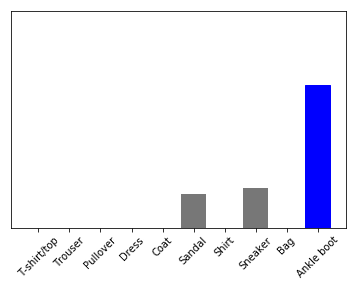

In [32]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` devuelve una lista de listas, una para cada imagen en el lote de datos. Agarra las predicciones para nuestra (única) imagen en el lote de imagenes:

In [33]:
np.argmax(predictions_single[0])

9

Y, como antes, el modelo predice una etiqueta de 9.